## **UPLOAD AND READ THE DATASET**

In [ ]:
import pandas as pd
#Import Pandas untuk penggunaan DataFrame
import numpy as np
#Import NumpPy untuk mempermudah analisis
import matplotlib.pyplot as plt
#Import Matplotlib untuk membuat plot data
import seaborn as sns

from sklearn.model_selection import train_test_split

#Insert and read the raw data
df = pd.read_csv('data.csv')
data = pd.DataFrame(df)
print(data)

       year  month duoarea      area-name product product-name process  \
0      2014      1     SFL        FLORIDA    EPG0  Natural Gas     VCS   
1      2014      1     SNH         USA-NH    EPG0  Natural Gas     VCS   
2      2014      1     SOR         USA-OR    EPG0  Natural Gas     VCS   
3      2014      1     SDE         USA-DE    EPG0  Natural Gas     VCS   
4      2014      1     SAZ         USA-AZ    EPG0  Natural Gas     VCS   
...     ...    ...     ...            ...     ...          ...     ...   
37989  2024      1     SMN      MINNESOTA    EPG0  Natural Gas     VRS   
37990  2024      1     SNE         USA-NE    EPG0  Natural Gas     VRS   
37991  2024      1     SVA         USA-VA    EPG0  Natural Gas     VRS   
37992  2024      1     SCT         USA-CT    EPG0  Natural Gas     VRS   
37993  2024      1     SMA  MASSACHUSETTS    EPG0  Natural Gas     VRS   

                  process-name    series  \
0       Commercial Consumption  N3020FL2   
1       Commercial Cons

# **MANIPULATING THE DATASET**

In [ ]:

#Get information about the raw data
data.info()
print()
#Get a quick and short overview of the raw data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                37994 non-null  int64  
 1   month               37994 non-null  int64  
 2   duoarea             37994 non-null  object 
 3   area-name           37994 non-null  object 
 4   product             37994 non-null  object 
 5   product-name        37994 non-null  object 
 6   process             37994 non-null  object 
 7   process-name        37994 non-null  object 
 8   series              37994 non-null  object 
 9   series-description  37994 non-null  object 
 10  value               37518 non-null  float64
 11  units               37994 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.5+ MB



,year,month,value
count,37994.000000,37994.000000,3.751800e+04
mean,2018.545455,6.454545,2.970826e+04
std,2.903442,3.473677,1.504204e+05
min,2014.000000,1.000000,0.000000e+00
25%,2016.000000,3.000000,8.092500e+02
50%,2019.000000,6.000000,4.380000e+03
75%,2021.000000,9.000000,1.616350e+04
max,2024.000000,12.000000,3.391775e+06


In [ ]:
#DATA CLEANING

#Detect and calculate the percentage of empty data in each column

data.isna().mean().round(3).mul(100)

year                  0.0
month                 0.0
duoarea               0.0
area-name             0.0
product               0.0
product-name          0.0
process               0.0
process-name          0.0
series                0.0
series-description    0.0
value                 1.3
units                 0.0
dtype: float64

In [ ]:
#Since the value column is a float dataype and has 1.3 percent of empty data, we can fill the blank with the median of all of the value data.
#This kind of Data Cleaning will not affect the dataset significantly since the percentage is very low.

data["value"]= data["value"].fillna(data["value"].median())
print(data["value"].isna().sum())
print()
#Detect and calculate the percentage of empty data in each column again
data.isna().mean().round(3).mul(100)

0



year                  0.0
month                 0.0
duoarea               0.0
area-name             0.0
product               0.0
product-name          0.0
process               0.0
process-name          0.0
series                0.0
series-description    0.0
value                 0.0
units                 0.0
dtype: float64

In [ ]:
#Check and detect about the duplicated data

data.duplicated().sum()

0

In [ ]:
#print the cleaned data
print(data)

       year  month duoarea      area-name product product-name process  \
0      2014      1     SFL        FLORIDA    EPG0  Natural Gas     VCS   
1      2014      1     SNH         USA-NH    EPG0  Natural Gas     VCS   
2      2014      1     SOR         USA-OR    EPG0  Natural Gas     VCS   
3      2014      1     SDE         USA-DE    EPG0  Natural Gas     VCS   
4      2014      1     SAZ         USA-AZ    EPG0  Natural Gas     VCS   
...     ...    ...     ...            ...     ...          ...     ...   
37989  2024      1     SMN      MINNESOTA    EPG0  Natural Gas     VRS   
37990  2024      1     SNE         USA-NE    EPG0  Natural Gas     VRS   
37991  2024      1     SVA         USA-VA    EPG0  Natural Gas     VRS   
37992  2024      1     SCT         USA-CT    EPG0  Natural Gas     VRS   
37993  2024      1     SMA  MASSACHUSETTS    EPG0  Natural Gas     VRS   

                  process-name    series  \
0       Commercial Consumption  N3020FL2   
1       Commercial Cons

# **ANALYZING THE DATASET**

In [ ]:
#create a new table contains several columns of the cleaned data

filtered_data = data[['year', 'area-name', 'process', 'process-name', 'series', 'series-description', 'value']]
print(filtered_data)

#Get any information about this new form of dataset
filtered_data.info()

       year      area-name process             process-name    series  \
0      2014        FLORIDA     VCS   Commercial Consumption  N3020FL2   
1      2014         USA-NH     VCS   Commercial Consumption  N3020NH2   
2      2014         USA-OR     VCS   Commercial Consumption  N3020OR2   
3      2014         USA-DE     VCS   Commercial Consumption  N3020DE2   
4      2014         USA-AZ     VCS   Commercial Consumption  N3020AZ2   
...     ...            ...     ...                      ...       ...   
37989  2024      MINNESOTA     VRS  Residential Consumption  N3010MN2   
37990  2024         USA-NE     VRS  Residential Consumption  N3010NE2   
37991  2024         USA-VA     VRS  Residential Consumption  N3010VA2   
37992  2024         USA-CT     VRS  Residential Consumption  N3010CT2   
37993  2024  MASSACHUSETTS     VRS  Residential Consumption  N3010MA2   

                                      series-description    value  
0      Natural Gas Deliveries to Commercial Consumers..

In [ ]:

#A function that will calculate the counts of each category in certain column and make it into a new table or data frame

def Data_Split(data, column1):
  split_data = data[column1].value_counts().to_dict()
  new_data_split_values = split_data.values()
  new_data_split_column = split_data.keys()

  list_of_new_data_split_values = list(new_data_split_values)
  list_of_new_data_split_column = list(new_data_split_column)
  new_list_of_new_data_split_values = [list_of_new_data_split_values]
  data_split_index = ["Counts"]
  dataframe_Data_Split = pd.DataFrame(new_list_of_new_data_split_values)
  dataframe_Data_Split.columns =  new_data_split_column
  dataframe_Data_Split.index = data_split_index
  return dataframe_Data_Split
  print()

In [ ]:
#A function that plot the previous function
def Data_Split_Plot(data, column1):
  split_data = data[column1].value_counts().to_dict()
  new_data_split_values = split_data.values()
  new_data_split_column = split_data.keys()
  fig = plt.figure(figsize = (13,8))
  plt.pie(x = new_data_split_values, labels = new_data_split_column, autopct= lambda p :'{:.2f}% ({:,.0f})'.format(p,p*sum(new_data_split_values)/100))
  print("\n")
  plt.show()

In [ ]:
#Applying these functions on certain columns

print("Area Name Data Distribution")
Data_Area_Name = Data_Split(data,"area-name")
Data_Area_Name.T

Area Name Data Distribution


,Counts
U.S.,968
USA-NH,726
USA-KY,726
USA-TN,726
MINNESOTA,726
USA-UT,726
USA-IL,726
USA-AL,726
USA-PA,726
MASSACHUSETTS,726


In [ ]:
print("Series Data Distribution")
Data_Series_Name = Data_Split(data,"series")
Data_Series_Name.T

Series Data Distribution


,Counts
N3020FL2,121
N3025US2,121
N3045NY2,121
N3045TN2,121
N3045TX2,121
...,...
N3010IL2,121
N3010IA2,121
N3035MN2,121
N3035LA2,121


In [ ]:

print("Series Description Data Distribution")
Data_Process_Name = Data_Split(data,"series-description")
Data_Process_Name.T

Series Description Data Distribution


,Counts
Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in Florida (MMcf),121
U.S. Natural Gas Vehicle Fuel Consumption (MMcf),121
New York Natural Gas Deliveries to Electric Power Consumers (MMcf),121
Tennessee Natural Gas Deliveries to Electric Power Consumers (MMcf),121
Texas Natural Gas Deliveries to Electric Power Consumers (MMcf),121
...,...
Illinois Natural Gas Residential Consumption (MMcf),121
Iowa Natural Gas Residential Consumption (MMcf),121
Minnesota Natural Gas Industrial Consumption (MMcf),121
Louisiana Natural Gas Industrial Consumption (MMcf),121


In [ ]:
print("Process Data Distribution")
Data_Process = Data_Split(data,"process")
Data_Process.T

Process Data Distribution


,Counts
VCS,6292
VDV,6292
VEU,6292
VGT,6292
VIN,6292
VRS,6292
VGP,121
VGL,121


In [ ]:
print("Year Data Distribution")
Data_Year = Data_Split(data,"year")
Data_Year.T

Year Data Distribution


,Counts
2014,3768
2015,3768
2016,3768
2017,3768
2018,3768
2019,3768
2020,3768
2021,3768
2022,3768
2023,3768


In [ ]:

print("Process Name Data Distribution")
Data_Process_Name = Data_Split(data,"process-name")
Data_Process_Name.T

Process Name Data Distribution


,Counts
Commercial Consumption,6292
Vehicle Fuel Consumption,6292
Electric Power Consumption,6292
Delivered to Consumers,6292
Industrial Consumption,6292
Residential Consumption,6292
Pipeline Fuel Consumption,121
Lease and Plant Fuel Consumption,121


Process Data Distribution




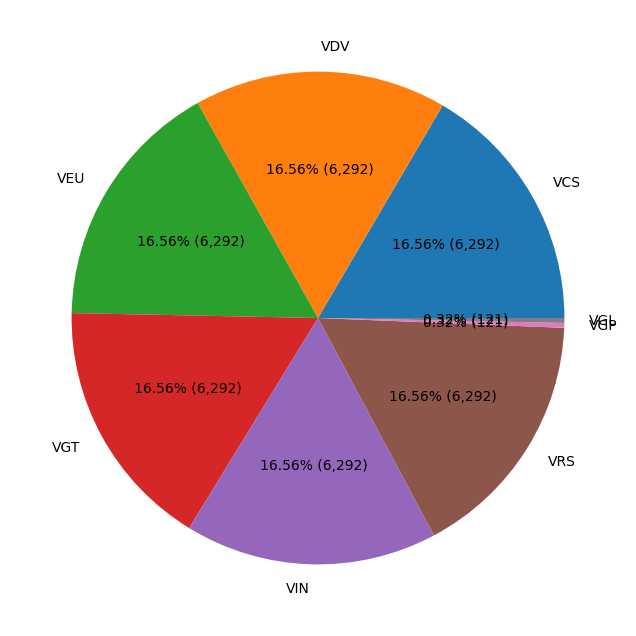



Year Data Distribution




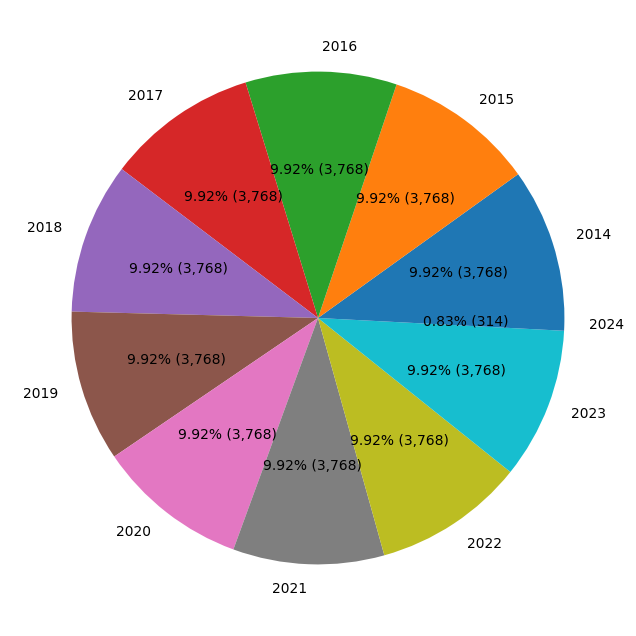



Process Name Data Distribution




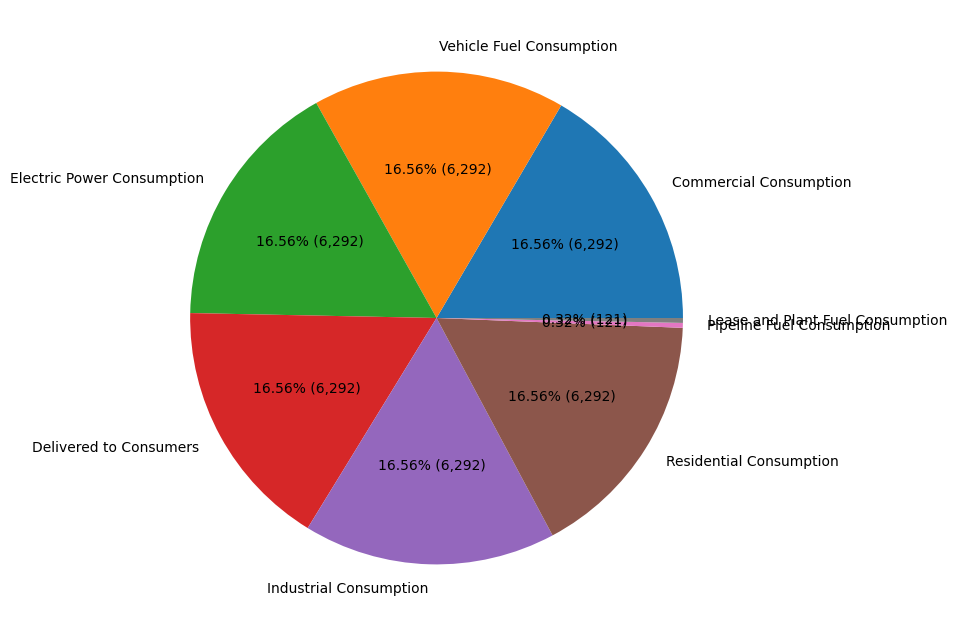

In [ ]:
print("Process Data Distribution")
Data_Process_Plot = Data_Split_Plot(data, "process")
print("\n")
print("Year Data Distribution")
Data_Year_Plot = Data_Split_Plot(data, "year")
print("\n")
print("Process Name Data Distribution")
Data_Process_Name = Data_Split_Plot(data, "process-name")

# **ANNUAL AND SEASONAL ANALYSIS OF THE DATASET**

In [ ]:

#Annual and Seasonal Distribution
#This will focus on Annual and Seasonal Usage of Natural Gas Distribution

year_and_month_data = data[['year', 'month', 'value']]
print(year_and_month_data)

year_and_month_data.info()

       year  month    value
0      2014      1   6605.0
1      2014      1   1691.0
2      2014      1   4711.0
3      2014      1   2128.0
4      2014      1   3915.0
...     ...    ...      ...
37989  2024      1  24866.0
37990  2024      1   7800.0
37991  2024      1  15938.0
37992  2024      1   9299.0
37993  2024      1  20557.0

[37994 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    37994 non-null  int64  
 1   month   37994 non-null  int64  
 2   value   37994 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 890.6 KB


In [ ]:
#create unique list of names
UniqueNamesYear = year_and_month_data.year.unique()

#create a data frame dictionary to store your data frames
DataFrameDictYear = {elem : pd.DataFrame() for elem in UniqueNamesYear}

for key in DataFrameDictYear.keys():
    DataFrameDictYear[key] = year_and_month_data[:][year_and_month_data.year == key]



In [ ]:
#A function that will separate each value to eash month in each year and sum it into their respective season.
#We do not include data from 2024 since the data are not complete yet (only data on January are available)

def Seasonal_Usage(key):
    Month_Data = DataFrameDictYear[key][['month', 'value']]
    Total_Data = DataFrameDictYear[key]['value'].sum()
    Calculation_Each_Month = Month_Data.groupby('month')['value'].sum()
    Winter_Month = [12, 1, 2]
    Winter_Month_Usage = Calculation_Each_Month[Calculation_Each_Month.index.isin(Winter_Month)].sum()
    Percent_Winter = Winter_Month_Usage / Total_Data*100
    Spring_Month = [3, 4, 5]
    Spring_Month_Usage = Calculation_Each_Month[Calculation_Each_Month.index.isin(Spring_Month)].sum()
    Percent_Spring = Spring_Month_Usage / Total_Data*100
    Summer_Month = [6, 7, 8]
    Summer_Month_Usage = Calculation_Each_Month[Calculation_Each_Month.index.isin(Summer_Month)].sum()
    Percent_Summer = Summer_Month_Usage / Total_Data*100
    Autumn_Month = [9, 10, 11]
    Autumn_Month_Usage = Calculation_Each_Month[Calculation_Each_Month.index.isin(Autumn_Month)].sum()
    Percent_Autumn = Autumn_Month_Usage / Total_Data*100
    total_seasonal_data = [Winter_Month_Usage, Percent_Winter, Spring_Month_Usage,Percent_Spring, Summer_Month_Usage, Percent_Summer, Autumn_Month_Usage, Percent_Autumn]
    total_seasonal_data_list = list(total_seasonal_data)
    Total_Seasonal_Data = pd.DataFrame(total_seasonal_data_list)
    Total_Seasonal_Data.index = ['Winter', 'Winter%','Spring','Spring%', 'Summer', 'Summer%', 'Autumn', 'Autumn%']
    Total_Seasonal_Data.columns =["Total Value"]
    return Total_Seasonal_Data

In [ ]:
def Monthly_Usage(key):
    Monthly_Data = DataFrameDictYear[key][['month', 'value']]
    Total_Data_Monthly = DataFrameDictYear[key]['value'].sum()
    Calculation_Each_Month = Monthly_Data.groupby('month')['value'].sum()
    list_Calculation_Each_Month = list(Calculation_Each_Month)
    Percent_Monthly_Data = []
    for i in range(len(list_Calculation_Each_Month)):
      Percent_Data = list_Calculation_Each_Month[i]/Total_Data_Monthly*100
      Percent_Monthly_Data.append(Percent_Data)

    Each_Month_Data = pd.DataFrame(Calculation_Each_Month)
    Each_Month_Data.index = ['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    Each_Month_Data.columns =["Total Value"]

    Each_Month_Data_Percentage = pd.DataFrame(Percent_Monthly_Data)
    Each_Month_Data_Percentage.index = ['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    Each_Month_Data_Percentage.columns =["Total Value"]

    monthly_data = [Each_Month_Data, Each_Month_Data_Percentage]
    list_Monthly_Data = list(monthly_data)
    Monthly_Data = pd.concat(list_Monthly_Data, axis = 1)
    Monthly_Data.index = ['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    Monthly_Data.columns =["Total Value","Percentage"]

    return Each_Month_Data, Each_Month_Data_Percentage, Monthly_Data

In [ ]:
Month_2014, Percent_Month_2014, Total_Month_2014  = Monthly_Usage(2014)

Month_2015, Percent_Month_2015, Total_Month_2015  = Monthly_Usage(2015)

Month_2016, Percent_Month_2016, Total_Month_2016  = Monthly_Usage(2016)

Month_2017, Percent_Month_2017, Total_Month_2017  = Monthly_Usage(2017)

Month_2018, Percent_Month_2018, Total_Month_2018  = Monthly_Usage(2018)

Month_2019, Percent_Month_2019, Total_Month_2019  = Monthly_Usage(2019)

Month_2020, Percent_Month_2020, Total_Month_2020  = Monthly_Usage(2020)

Month_2021, Percent_Month_2021, Total_Month_2021  = Monthly_Usage(2021)

Month_2022, Percent_Month_2022, Total_Month_2022  = Monthly_Usage(2022)

Month_2023, Percent_Month_2023, Total_Month_2023  = Monthly_Usage(2023)

In [ ]:
All_Month_Usage_list = [Month_2014, Month_2015, Month_2016, Month_2017, Month_2018, Month_2019, Month_2020, Month_2021, Month_2022, Month_2023]
All_Month_Usage = pd.concat(All_Month_Usage_list, axis = 0)
#All_Month_Usage.columns = ['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#All_Month_Usage.index =[2014,2015,2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
All_Month_Usage

,Total Value
January,12204328.0
February,10418111.0
March,9662526.0
April,7330720.0
May,6727590.0
...,...
August,9890252.0
September,8676999.0
October,8915573.0
November,10428965.0


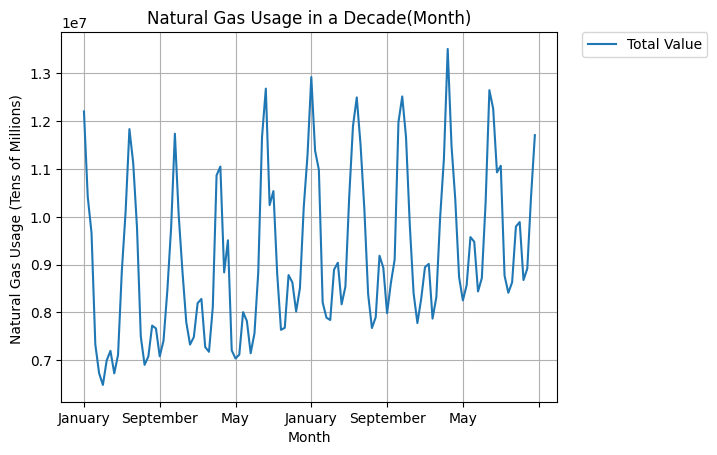

In [ ]:
All_Month_Usage.plot(y =  ['Total Value'], use_index = True)

plt.title(f"Natural Gas Usage in a Decade(Month)")
plt.xlabel("Month")
plt.ylabel("Natural Gas Usage (Tens of Millions) ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.show()

In [ ]:
All_Month_Percent_Usage_list = [Percent_Month_2014, Percent_Month_2015, Percent_Month_2016, Percent_Month_2017, Percent_Month_2018, Percent_Month_2019, Percent_Month_2020, Percent_Month_2021, Percent_Month_2022, Percent_Month_2023]
All_Month_Percent_Usage = pd.concat(All_Month_Percent_Usage_list, axis = 0)
#All_Month_Usage.columns = ['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#All_Month_Usage.index =[2014,2015,2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
All_Month_Percent_Usage

,Total Value
January,12.223675
February,10.434626
March,9.677843
April,7.342341
May,6.738255
...,...
August,8.277399
September,7.261997
October,7.461666
November,8.728262


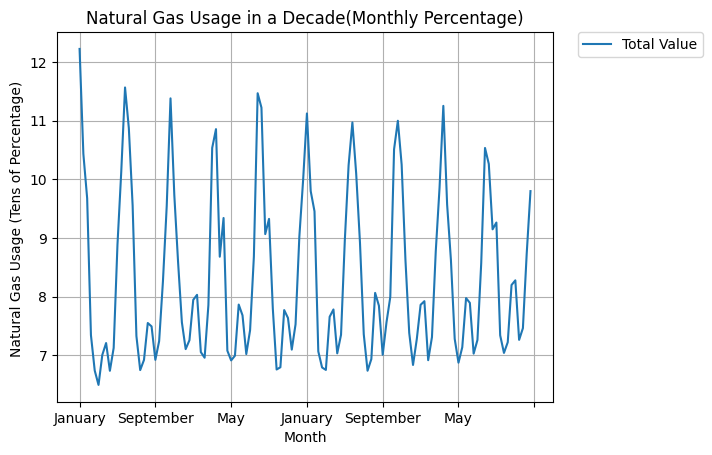

In [ ]:
All_Month_Percent_Usage.plot(y =  ['Total Value'], use_index = True)

plt.title(f"Natural Gas Usage in a Decade(Monthly Percentage)")
plt.xlabel("Month")
plt.ylabel("Natural Gas Usage (Tens of Percentage) ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.show()

In [ ]:
#PREDICTING THE DATA WITH ARIMA MODEL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

def Train_and_Test_Data(dataset):
  limit = 12
  diff_length = 120 - limit
  global split_data_train

  split_data_train = dataset.iloc[:diff_length]
  global split_data_test
  split_data_test = dataset.iloc[diff_length:]
  adf_test = adfuller(split_data_train)
  if adf_test[1] < 0.05:
    print('Rejecting null hypotesis. This data is stationary')
  else :
    print('Not able to rejecting the null hypotesis. This data is not stationary')
  return adf_test[1], split_data_train, split_data_test


In [ ]:
Predict_Month, Train_Month, Test_Month = Train_and_Test_Data(All_Month_Usage)
Predict_Month



Not able to rejecting the null hypotesis. This data is not stationary


0.9081867890058957

In [ ]:
Predict_Month_Percent, Train_Month_Percent, Test_Month_Percent = Train_and_Test_Data(All_Month_Percent_Usage)
Predict_Month_Percent



Not able to rejecting the null hypotesis. This data is not stationary


0.09404429055744101

# **SARIMA MODEL**

In [ ]:
#SARIMA MODEL
!pip install --upgrade numpy
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [ ]:
import statsmodels.api as sm

def SARIMAX_Model(data_train ):
  global index_data_train
  index_data_train = data_train.index
  SARIMAX_model = pm.auto_arima(data_train, exogenous=index_data_train,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
  return SARIMAX_model

In [ ]:
Month_SARIMAX = SARIMAX_Model(Train_Month)
Month_SARIMAX

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
Month_SARIMAX_Percent = SARIMAX_Model(Train_Month_Percent)
Month_SARIMAX_Percent

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error

# Assume 'data' is your time series data
def SARIMAX_Predict( dataset, data_train, data_test, p, d, q, P, D, Q):
  model_Sarimax = SARIMAX(data_train, order=(p, d, q), seasonal_order=(P, D, Q, 12))
  model_Sarimax_fit = model_Sarimax.fit()
  start = len(data_train)
  end = len(data_train) + len(data_test) -1
  index_data_test = data_test.index
  predictions = model_Sarimax_fit.predict(start=start, end=end, dynamic=False, typ='levels')

  pd_predictions = pd.DataFrame(predictions)

  pd_predictions.index = index_data_test
  list_both = [data_test, pd_predictions]
  data_predict = pd.concat(list_both, axis = 1)
  data_predict.columns = ['Actual Value', 'Forecast Value']
  data_predict.loc[len(data_predict.index)] = data_predict.sum()
  data_predict['Difference'] = abs((data_predict['Forecast Value'] - data_predict['Actual Value'])/data_predict['Actual Value'])*100
  data_predict.index = ['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Total Value']

  forecast_data = model_Sarimax_fit.forecast(steps = 24)
  list_forecast_data = list(forecast_data)
  pd_forecast_data = pd.DataFrame(list_forecast_data[12:24])
  pd_forecast_data.loc[len(pd_forecast_data.index)] = pd_forecast_data.sum()
  pd_forecast_data.index = ['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'Total Value']
  pd_forecast_data.columns = ['Forecast Value']

  pd.set_option('display.float_format', lambda x: f'{x:.0f}' if abs(x) > 1e3 else f'{x:.2f}')

  MSE = mean_squared_error(data_predict['Actual Value'], data_predict['Forecast Value'])
  MSLE = mean_squared_log_error(data_predict['Actual Value'], data_predict['Forecast Value'])
  MAE = mean_absolute_error(data_predict['Actual Value'], data_predict['Forecast Value'])
  RMSE = mean_squared_error(data_predict['Actual Value'], data_predict['Forecast Value'], squared = False)
  NRMSE = RMSE / (max(data_predict['Actual Value']) - min(data_predict['Actual Value']))
  NMAE = MAE / (max(data_predict['Actual Value']) - min(data_predict['Actual Value']))
  return data_predict, pd_forecast_data, MSLE, NMAE, NRMSE


In [ ]:
def Visual_Predict(dataset_predict):
  plt.figure(figsize=(12, 6))  # Set the figure size
  plt.plot(['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], dataset_predict.iloc[:12, 0], label='Actual Value')
  plt.plot(['January', 'February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], dataset_predict.iloc[:12, 1], label='Forecast Value')  # Plot each column against the index

  plt.xlabel('Month')  # Set the x-axis label
  plt.ylabel('Values')  # Set the y-axis label
  plt.title('Comparation between Predicted and Real Total Value')  # Set the title
  plt.legend()  # Show the legend
  plt.grid(True)  # Show grid
  return plt.show()  # Display the plot

In [ ]:
Predict_Month_Sarimax, Forecast_Month, MSLE_Month, NMAE_Month, NRMSE_Month = SARIMAX_Predict(All_Month_Usage, Train_Month,Test_Month,1,1,0,0,1,1)
Predict_Month_Sarimax



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

,Actual Value,Forecast Value,Difference
January,12261451,14543913,18.61
February,10929598,12692899,16.13
March,11067925,11481843,3.74
April,8770263,9881472,12.67
May,8411423,9378183,11.49
June,8629278,9711629,12.54
July,9795098,10688495,9.12
August,9890252,10605109,7.23
September,8676999,9556306,10.13
October,8915573,9854666,10.53


In [ ]:
Forecast_Month

,Forecast Value
January,15602007
February,13745810
March,12535931
April,10935292
May,10432064
June,10765497
July,11742365
August,11658979
September,10610176
October,10908535


In [ ]:

Error = [MSLE_Month, NMAE_Month, NRMSE_Month]
pd_Error = pd.DataFrame(Error)
pd_Error.columns = ['Error Value']
pd_Error.index = ['Mean Squared Logarithmic Error', 'Normalized Mean Absolute Error', 'Normalized Root Mean Squared Error']
pd_Error

,Error Value
Mean Squared Logarithmic Error,0.01
Normalized Mean Absolute Error,0.02
Normalized Root Mean Squared Error,0.04


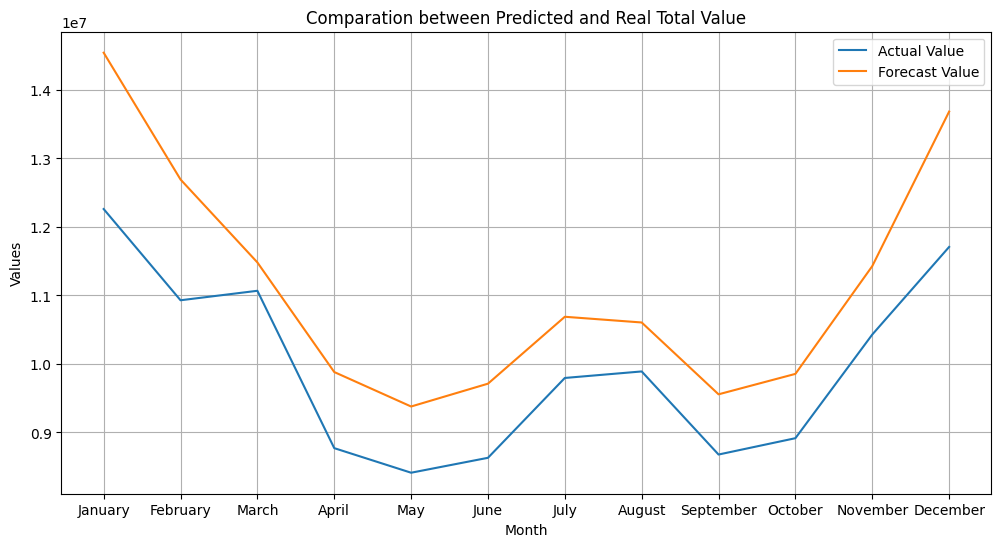

In [ ]:
Graph_Month_Predict = Visual_Predict(Predict_Month_Sarimax)
Graph_Month_Predict

In [ ]:
Predict_Month_Sarimax_Percent, Forecast_Month_Percent, MSLE_Month_Percent, NMAE_Month_Percent, NRMSE_Month_Percent = SARIMAX_Predict(All_Month_Percent_Usage, Train_Month_Percent,Test_Month_Percent,0,0,1,0,1,1)
Predict_Month_Sarimax_Percent

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local

,Actual Value,Forecast Value,Difference
January,10.26,11.23,9.48
February,9.15,9.81,7.23
March,9.26,8.96,3.22
April,7.34,7.34,0.03
May,7.04,6.83,2.98
June,7.22,7.02,2.83
July,8.20,7.84,4.40
August,8.28,7.80,5.79
September,7.26,6.99,3.71
October,7.46,7.33,1.73


In [ ]:
Forecast_Month_Percent

,Forecast Value
January,11.20
February,9.81
March,8.96
April,7.34
May,6.83
June,7.02
July,7.84
August,7.80
September,6.99
October,7.33


In [ ]:
Error_Percent = [MSLE_Month_Percent, NMAE_Month_Percent, NRMSE_Month_Percent]
pd_Error_Percent = pd.DataFrame(Error_Percent)
pd_Error_Percent.columns = ['Error Value']
pd_Error_Percent.index = ['Mean Squared Logarithmic Error', 'Normalized Mean Absolute Error', 'Normalized Root Mean Squared Error']
pd_Error_Percent

,Error Value
Mean Squared Logarithmic Error,0.00
Normalized Mean Absolute Error,0.00
Normalized Root Mean Squared Error,0.00


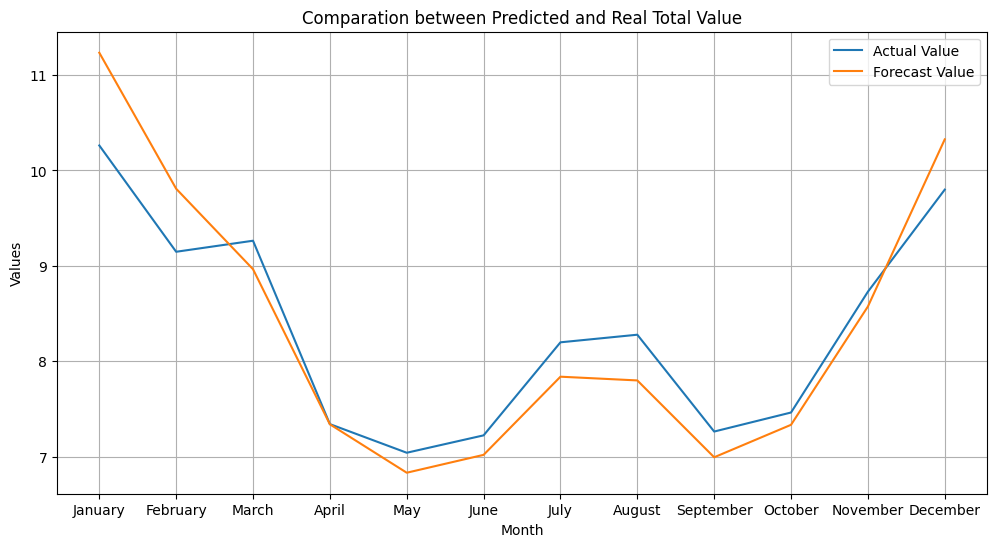

In [ ]:
Graph_Month_Predict_Percent = Visual_Predict(Predict_Month_Sarimax_Percent)
Graph_Month_Predict_Percent

# **SEASONAL**

In [ ]:
#Implementation of previous function

Year_2014 = Seasonal_Usage(2014)

Year_2015 = Seasonal_Usage(2015)

Year_2016 = Seasonal_Usage(2016)

Year_2017 = Seasonal_Usage(2017)

Year_2018 = Seasonal_Usage(2018)

Year_2019 = Seasonal_Usage(2019)

Year_2020 = Seasonal_Usage(2020)

Year_2021 = Seasonal_Usage(2021)

Year_2022 = Seasonal_Usage(2022)

Year_2023 = Seasonal_Usage(2023)

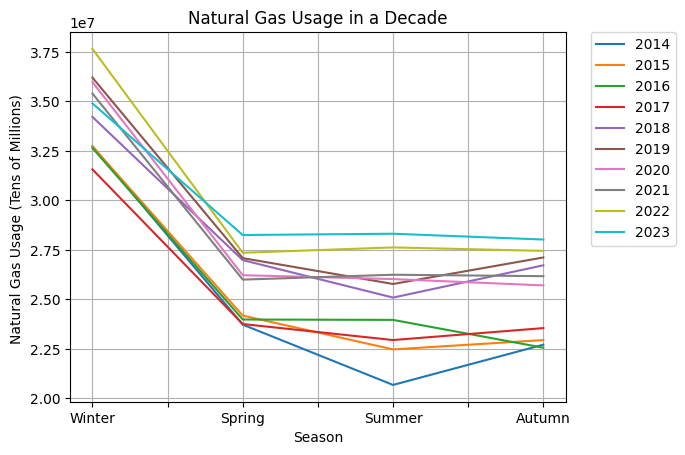

In [ ]:
#Combine all of the annual data into one single data frame / table and graph it with line

All_Years_Usage_list = [Year_2014.iloc[[0,2,4,6]], Year_2015.iloc[[0,2,4,6]], Year_2016.iloc[[0,2,4,6]], Year_2017.iloc[[0,2,4,6]], Year_2018.iloc[[0,2,4,6]], Year_2019.iloc[[0,2,4,6]], Year_2020.iloc[[0,2,4,6]], Year_2021.iloc[[0,2,4,6]], Year_2022.iloc[[0,2,4,6]], Year_2023.iloc[[0,2,4,6]]]
All_Years_Usage = pd.concat(All_Years_Usage_list, axis = 1)
All_Years_Usage.columns = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

All_Years_Usage.plot(y =  [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], use_index = True)

plt.title(f"Natural Gas Usage in a Decade")
plt.xlabel("Season")
plt.ylabel("Natural Gas Usage (Tens of Millions) ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.show()


In [ ]:
#Show the annual dataframe on each season
All_Years_Usage_Total_list = [Year_2014, Year_2015, Year_2016, Year_2017, Year_2018, Year_2019, Year_2020, Year_2021, Year_2022, Year_2023]
All_Years_Usage_Total = pd.concat(All_Years_Usage_Total_list, axis = 1).T
All_Years_Usage_Total.columns =['Winter', 'Winter%','Spring','Spring%', 'Summer', 'Summer%', 'Autumn', 'Autumn%']
All_Years_Usage_Total.index =  [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

All_Years_Usage_Total

,Winter,Winter%,Spring,Spring%,Summer,Summer%,Autumn,Autumn%
2014,32736976,32.79,23720836,23.76,20675395,20.71,22708522,22.74
2015,32727116,31.99,24178372,23.63,22470195,21.96,22941185,22.42
2016,32644708,31.65,23980646,23.25,23961337,23.23,22555341,21.87
2017,31563212,31.00,23751777,23.33,22943248,22.54,23546055,23.13
2018,34216550,30.28,26981487,23.88,25088023,22.20,26719425,23.64
2019,36202897,31.16,27081685,23.31,25775348,22.19,27115933,23.34
2020,35977565,31.58,26219660,23.01,26023453,22.84,25704105,22.56
2021,35398287,31.10,25996134,22.84,26242504,23.06,26170057,23.00
2022,37652201,31.36,27352284,22.78,27622887,23.00,27446842,22.86
2023,34899244,29.21,28249611,23.64,28314628,23.70,28021537,23.45


In [ ]:
#Sum all of the annual data in their respective year

Total_All_Years_Usage = All_Years_Usage.sum(axis = 0)
pd_Total_All_Years_Usage = pd.DataFrame(Total_All_Years_Usage).T
pd_Total_All_Years_Usage.index = ['Total Value']
pd_Total_All_Years_Usage_T = pd_Total_All_Years_Usage.T
pd_Total_All_Years_Usage_T

,Total Value
2014,99841729
2015,102316868
2016,103142032
2017,101804292
2018,113005485
2019,116175863
2020,113924783
2021,113806982
2022,120074214
2023,119485020


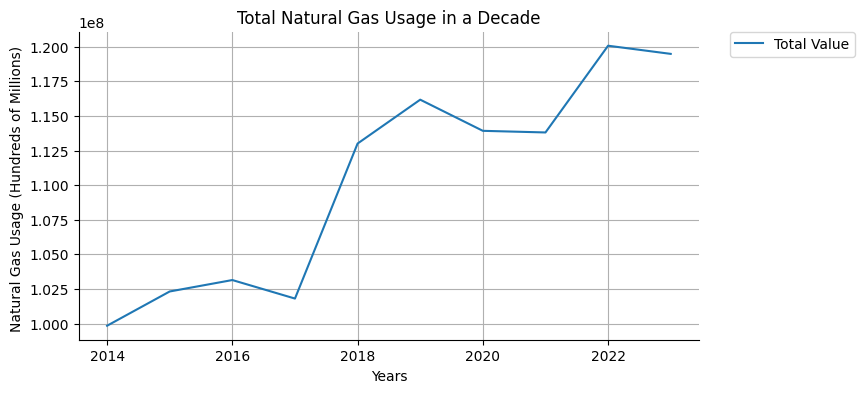

In [ ]:
#Plot that sum

from matplotlib import pyplot as plt
pd_Total_All_Years_Usage_T.plot(kind='line', figsize=(8, 4))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Total Natural Gas Usage in a Decade")
plt.xlabel("Years")
plt.ylabel("Natural Gas Usage (Hundreds of Millions) ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.grid(True)
plt.show()

In [ ]:
#Show the annual dataframe on each season with their respective total value

All_Years_NGU_Usage = pd.concat([ All_Years_Usage_Total, pd_Total_All_Years_Usage_T], axis = 1)

All_Years_NGU_Usage

,Winter,Winter%,Spring,Spring%,Summer,Summer%,Autumn,Autumn%,Total Value
2014,32736976,32.79,23720836,23.76,20675395,20.71,22708522,22.74,99841729
2015,32727116,31.99,24178372,23.63,22470195,21.96,22941185,22.42,102316868
2016,32644708,31.65,23980646,23.25,23961337,23.23,22555341,21.87,103142032
2017,31563212,31.00,23751777,23.33,22943248,22.54,23546055,23.13,101804292
2018,34216550,30.28,26981487,23.88,25088023,22.20,26719425,23.64,113005485
2019,36202897,31.16,27081685,23.31,25775348,22.19,27115933,23.34,116175863
2020,35977565,31.58,26219660,23.01,26023453,22.84,25704105,22.56,113924783
2021,35398287,31.10,25996134,22.84,26242504,23.06,26170057,23.00,113806982
2022,37652201,31.36,27352284,22.78,27622887,23.00,27446842,22.86,120074214
2023,34899244,29.21,28249611,23.64,28314628,23.70,28021537,23.45,119485020


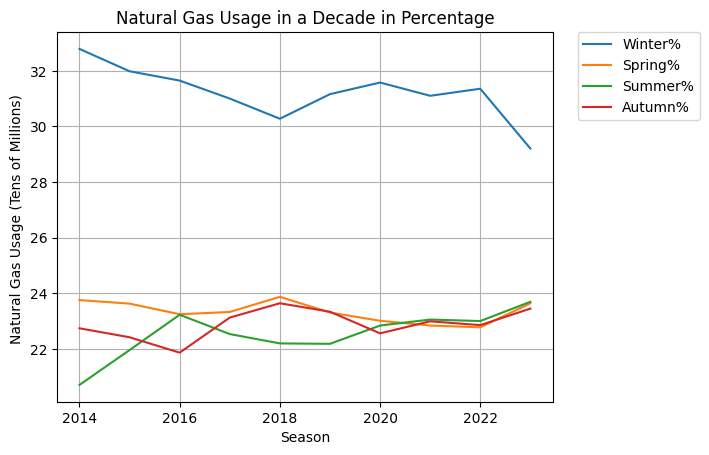

In [ ]:
All_Years_NGU_Usage.plot(y =  ['Winter%', 'Spring%', 'Summer%', 'Autumn%'], use_index = True)

plt.title(f"Natural Gas Usage in a Decade in Percentage")
plt.xlabel("Season")
plt.ylabel("Natural Gas Usage (Tens of Millions) ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.show()


In [ ]:
#similar with previous one but this is a seasonal data

Winter_Usage_list = [Year_2014.iloc[0,0], Year_2015.iloc[0,0], Year_2016.iloc[0,0], Year_2017.iloc[0,0], Year_2018.iloc[0,0], Year_2019.iloc[0,0], Year_2020.iloc[0,0], Year_2021.iloc[0,0], Year_2022.iloc[0,0], Year_2023.iloc[0,0]]
Winter_Usage = pd.DataFrame(Winter_Usage_list)

Spring_Usage_list = [Year_2014.iloc[2,0], Year_2015.iloc[2,0], Year_2016.iloc[2,0], Year_2017.iloc[2,0], Year_2018.iloc[2,0], Year_2019.iloc[2,0], Year_2020.iloc[2,0], Year_2021.iloc[2,0], Year_2022.iloc[2,0], Year_2023.iloc[2,0]]
Spring_Usage = pd.DataFrame(Spring_Usage_list)

Summer_Usage_list = [Year_2014.iloc[4,0], Year_2015.iloc[4,0], Year_2016.iloc[4,0], Year_2017.iloc[4,0], Year_2018.iloc[4,0], Year_2019.iloc[4,0], Year_2020.iloc[4,0], Year_2021.iloc[4,0], Year_2022.iloc[4,0], Year_2023.iloc[4,0]]
Summer_Usage = pd.DataFrame(Summer_Usage_list)

Autumn_Usage_list = [Year_2014.iloc[6,0], Year_2015.iloc[6,0], Year_2016.iloc[6,0], Year_2017.iloc[6,0], Year_2018.iloc[6,0], Year_2019.iloc[6,0], Year_2020.iloc[6,0], Year_2021.iloc[6,0], Year_2022.iloc[6,0], Year_2023.iloc[6,0]]
Autumn_Usage = pd.DataFrame(Autumn_Usage_list)

YoY_Usage_list = [Winter_Usage, Spring_Usage, Summer_Usage, Autumn_Usage]
YoY_Usage = pd.concat(YoY_Usage_list, axis = 1)
YoY_Usage.index = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
YoY_Usage.columns =["Winter", "Spring", "Summer", "Autumn"]
YoY_Usage





,Winter,Spring,Summer,Autumn
2014,32736976,23720836,20675395,22708522
2015,32727116,24178372,22470195,22941185
2016,32644708,23980646,23961337,22555341
2017,31563212,23751777,22943248,23546055
2018,34216550,26981487,25088023,26719425
2019,36202897,27081685,25775348,27115933
2020,35977565,26219660,26023453,25704105
2021,35398287,25996134,26242504,26170057
2022,37652201,27352284,27622887,27446842
2023,34899244,28249611,28314628,28021537


<Figure size 2500x800 with 0 Axes>

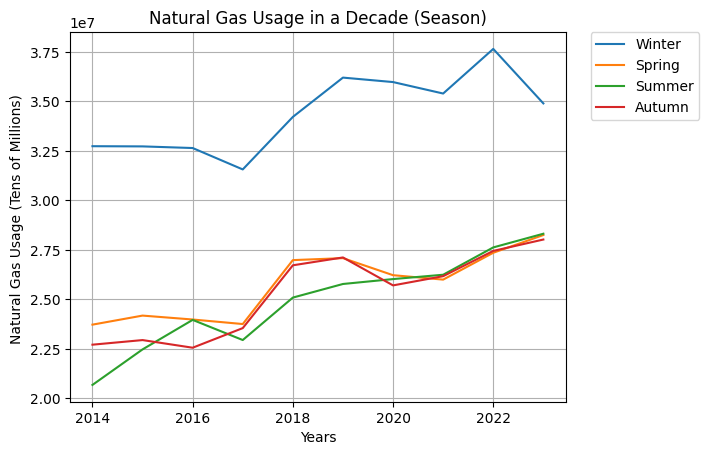

In [ ]:
print("\n")
plt.figure(figsize=(25,8))
YoY_Usage.plot(y =  ["Winter", "Spring", "Summer", "Autumn"], use_index = True)
plt.title(f"Natural Gas Usage in a Decade (Season)")
plt.xlabel("Years")
plt.ylabel("Natural Gas Usage (Tens of Millions) ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True)

In [ ]:
Total_YoY_Usage = YoY_Usage.sum(axis = 0)
pd_Total_YoY_Usage = pd.DataFrame(Total_YoY_Usage).T
pd_Total_YoY_Usage.index = ['Total Value']
pd_Total_YoY_Usage_T = pd_Total_YoY_Usage.T
pd_Total_YoY_Usage.T


,Total Value
Winter,344018756
Spring,257512492
Summer,249117018
Autumn,252929002


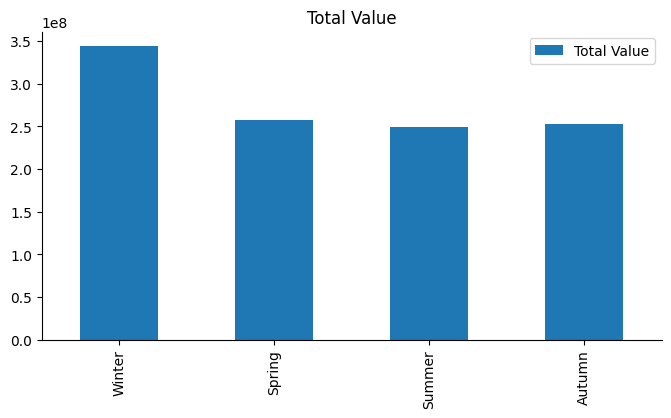

In [ ]:

pd_Total_YoY_Usage.T.plot(kind='bar', figsize=(8, 4), title='Total Value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
Year_On_Year_Usage = pd.concat([ YoY_Usage, pd_Total_YoY_Usage])
Year_On_Year_Usage

,Winter,Spring,Summer,Autumn
2014,32736976,23720836,20675395,22708522
2015,32727116,24178372,22470195,22941185
2016,32644708,23980646,23961337,22555341
2017,31563212,23751777,22943248,23546055
2018,34216550,26981487,25088023,26719425
2019,36202897,27081685,25775348,27115933
2020,35977565,26219660,26023453,25704105
2021,35398287,25996134,26242504,26170057
2022,37652201,27352284,27622887,27446842
2023,34899244,28249611,28314628,28021537


In [ ]:
#Process Usage Distribution

process_data = data[['process', 'value']]
print(process_data)

process_data.info()

      process  value
0         VCS   6605
1         VCS   1691
2         VCS   4711
3         VCS   2128
4         VCS   3915
...       ...    ...
37989     VRS  24866
37990     VRS   7800
37991     VRS  15938
37992     VRS   9299
37993     VRS  20557

[37994 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   process  37994 non-null  object 
 1   value    37994 non-null  float64
dtypes: float64(1), object(1)
memory usage: 593.8+ KB


In [ ]:
UniqueNamesProcess = process_data.process.unique()

#create a data frame dictionary to store your data frames
DataFrameDictProcess = {elem : pd.DataFrame() for elem in UniqueNamesProcess}
total_Data_Process = process_data['value'].sum()
Percentage_Data_Process = []
Data_Process = []
for key in DataFrameDictProcess.keys():
    DataFrameDictProcess[key] = process_data[:][process_data.process == key]
    Calculation_Each_Process = DataFrameDictProcess[key]['value'].sum()
    Percent_Data_Process = float(Calculation_Each_Process/total_Data_Process*100)
    Data_Process.append(Calculation_Each_Process)
    Percentage_Data_Process.append(Percent_Data_Process)


pd_Data_Process = pd.DataFrame(Data_Process)
pd_Percentage_Data_Process = pd.DataFrame(Percentage_Data_Process)
Combined_Data_Process = pd.concat([pd_Data_Process, pd_Percentage_Data_Process], axis = 1)
process_column = data['process'].value_counts().to_dict()
process_column_list = list(process_column.keys())
Combined_Data_Process.index = process_column_list
Combined_Data_Process.columns = ['Total Value', 'Percentage']
sorted_Com_Data_Process = Combined_Data_Process.sort_values(by = ['Total Value'], ascending = False)




sorted_Com_Data_Process


,Total Value,Percentage
VGT,543428684,48.66
VEU,216994799,19.43
VIN,164533519,14.73
VRS,96343890,8.63
VCS,67552564,6.05
VGL,17433791,1.56
VGP,9402492,0.84
VDV,989544,0.09


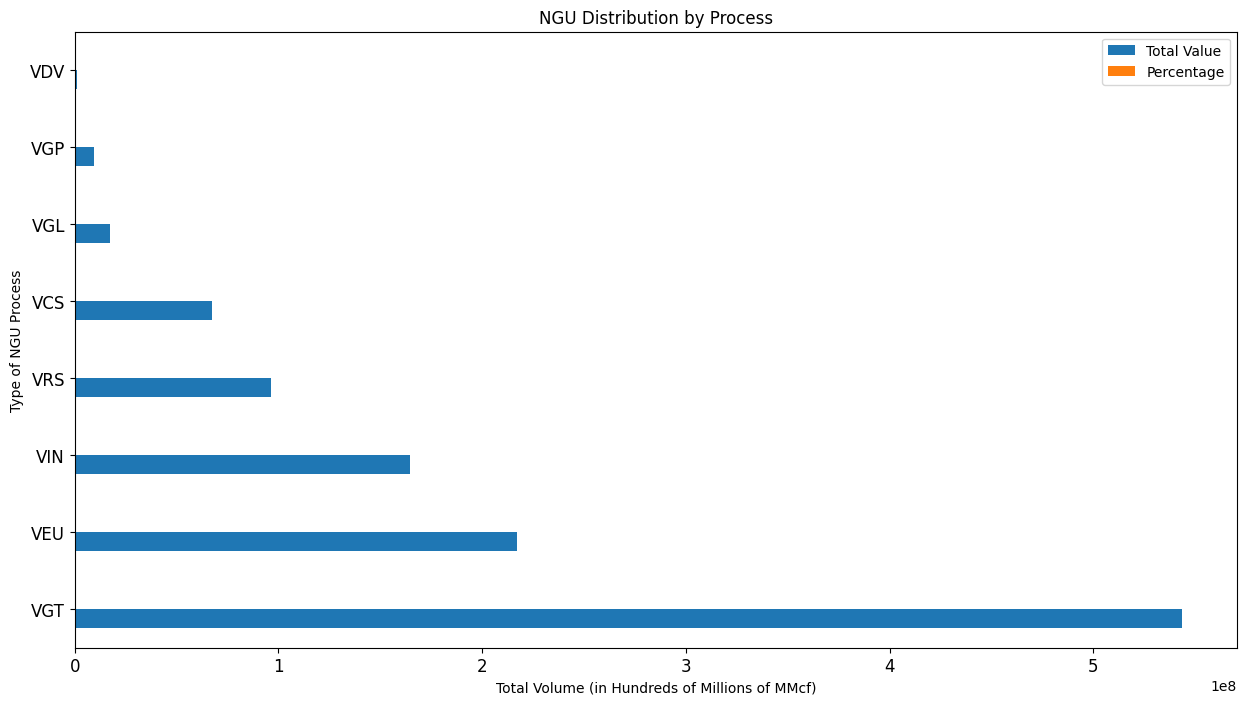

In [ ]:
process_graph = sorted_Com_Data_Process.plot(kind = 'barh',figsize=(15,8),legend=True, fontsize=12)
plt.title('NGU Distribution by Process')
plt.xlabel('Total Volume (in Hundreds of Millions of MMcf)')
plt.ylabel('Type of NGU Process')
plt.show()




In [ ]:
#Process Name Distribution
process_name_data = data[['process-name', 'value']]
process_name_data.columns = ['ProcessName', 'Value']
print(process_name_data)

process_name_data.info()

                   ProcessName  Value
0       Commercial Consumption   6605
1       Commercial Consumption   1691
2       Commercial Consumption   4711
3       Commercial Consumption   2128
4       Commercial Consumption   3915
...                        ...    ...
37989  Residential Consumption  24866
37990  Residential Consumption   7800
37991  Residential Consumption  15938
37992  Residential Consumption   9299
37993  Residential Consumption  20557

[37994 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProcessName  37994 non-null  object 
 1   Value        37994 non-null  float64
dtypes: float64(1), object(1)
memory usage: 593.8+ KB


In [ ]:
UniqueNamesProcessName = process_name_data.ProcessName.unique()

#create a data frame dictionary to store your data frames
DataFrameDictProcessName = {elem : pd.DataFrame() for elem in UniqueNamesProcessName}
total_Data_Process_Name = process_name_data['Value'].sum()
Percentage_Data_Process_Name = []
Data_Process_Name = []
for key in DataFrameDictProcessName.keys():
    DataFrameDictProcessName[key] = process_name_data[:][process_name_data.ProcessName == key]
    Calculation_Each_Process_Name = DataFrameDictProcessName[key]['Value'].sum()
    Percent_Data_Process_Name = float(Calculation_Each_Process_Name/total_Data_Process_Name*100)
    Data_Process_Name.append(Calculation_Each_Process_Name)
    Percentage_Data_Process_Name.append(Percent_Data_Process_Name)


pd_Data_Process_Name = pd.DataFrame(Data_Process_Name)
pd_Percentage_Data_Process_Name = pd.DataFrame(Percentage_Data_Process_Name)
Combined_Data_Process_Name = pd.concat([pd_Data_Process_Name, pd_Percentage_Data_Process_Name], axis = 1)
process_column = data['process-name'].value_counts().to_dict()
process_column_list = list(process_column.keys())
Combined_Data_Process_Name.index = process_column_list
Combined_Data_Process_Name.columns = ['Total Value', 'Percentage']
sorted_Com_Data_Process_Name = Combined_Data_Process_Name.sort_values(by = ['Total Value'], ascending = False)




sorted_Com_Data_Process_Name

,Total Value,Percentage
Delivered to Consumers,543428684,48.66
Electric Power Consumption,216994799,19.43
Industrial Consumption,164533519,14.73
Residential Consumption,96343890,8.63
Commercial Consumption,67552564,6.05
Lease and Plant Fuel Consumption,17433791,1.56
Pipeline Fuel Consumption,9402492,0.84
Vehicle Fuel Consumption,989544,0.09


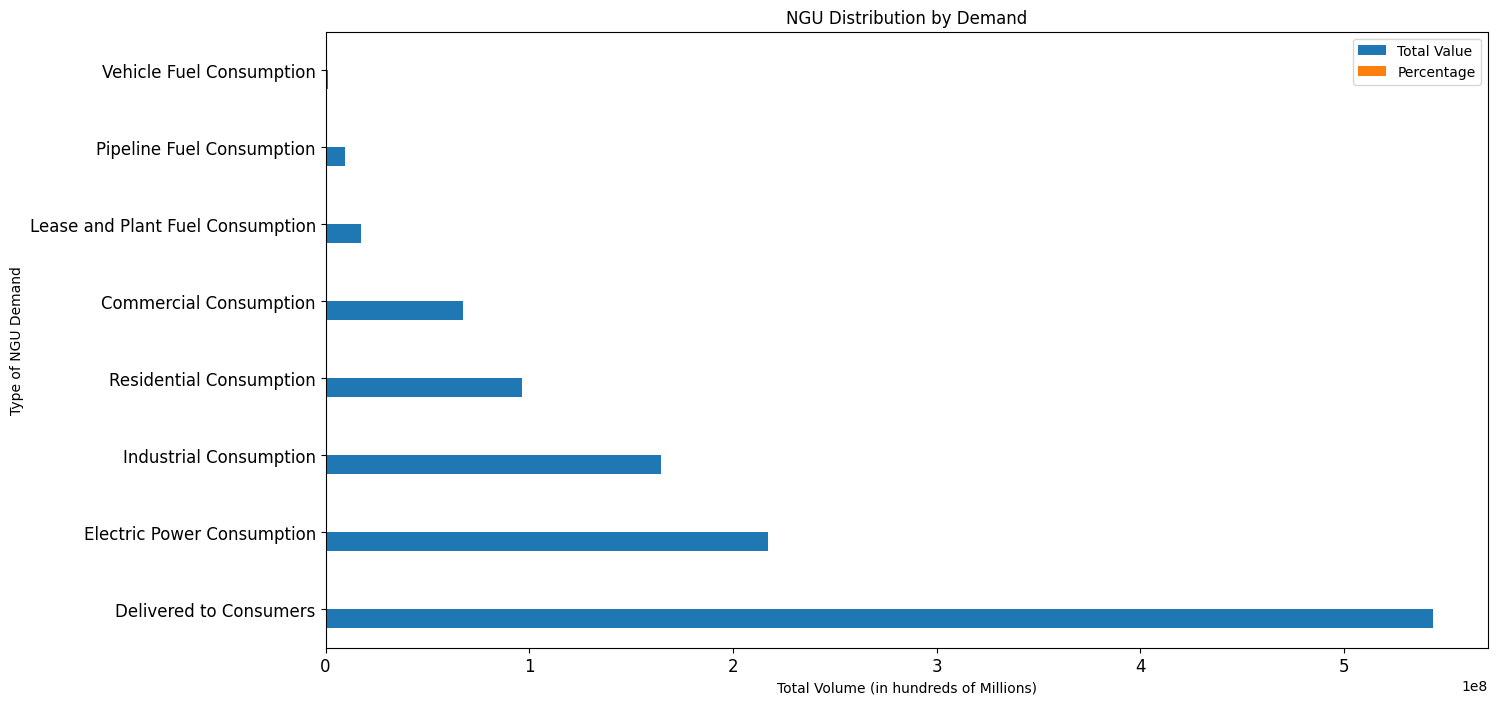

In [ ]:
process_Name_graph = sorted_Com_Data_Process_Name.plot(kind = 'barh',figsize=(15,8),legend=True, fontsize=12)
plt.title('NGU Distribution by Demand')
plt.xlabel('Total Volume (in hundreds of Millions)')
plt.ylabel('Type of NGU Demand')
plt.show()